# <h1 style="font-family: Trebuchet MS; color: #BA1141; font-size: 48px; text-align: center;line-height: 0; "> <b>Heart Disease Prediction <hr>

Cardiovascular disease or heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease. From WHO statistics every year 17.9 million dying from heart disease. The medical study says that human life style is the main reason behind this heart problem. Apart from this there are many key factors which warns that the person may/maynot getting chance of heart disease.



From the dataset if we create suitable machine learning technique which classify the heart disease more accurately, it is very helpful to the health organisation as well as patients.

## <div style="font-family: Trebuchet MS; background-color: #A5D7F5; color: #253DA1; padding: 12px; font-size: 25px; line-height: 1.5;">Import Packages</div>

In [1]:
# loading dataset
import numpy as np
import pandas as pd
# visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data spliting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
import pandas_profiling as pp
# ignore warning
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

/var/folders/96/swjvyczd05bg01j3wwrczbs00000gn/T/ipykernel_12167/135219741.py:22: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [2]:
# Reading Dataset
data = pd.read_csv("/Users/maryle/Library/CloudStorage/OneDrive-Personal/Project/heart.csv")
data.head().style.background_gradient('Blues')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.000000,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.100000,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.600000,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.000000,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.900000,1,3,2,0


In [3]:
# Print Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
# Check For Missing Value
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## <div style="font-family: Trebuchet MS; background-color: #A5D7F5; color: #253DA1; padding: 12px; font-size: 25px; line-height: 1.5;">EDA</div>

In [6]:
!pip install pandas-profiling

In [7]:
#Pandas profiling report
report = pp.ProfileReport(data)
display(report)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<AxesSubplot:>

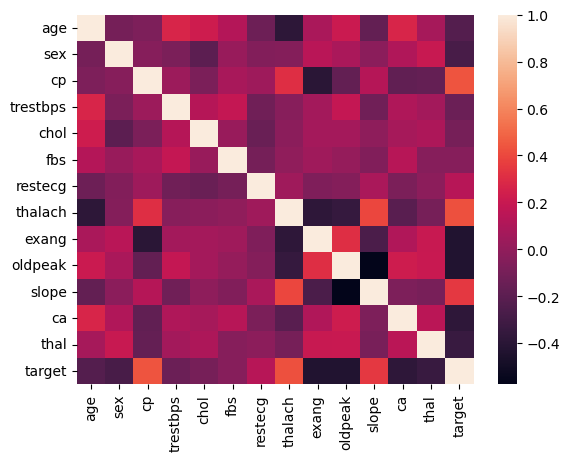

In [9]:
sns.heatmap(data.corr())

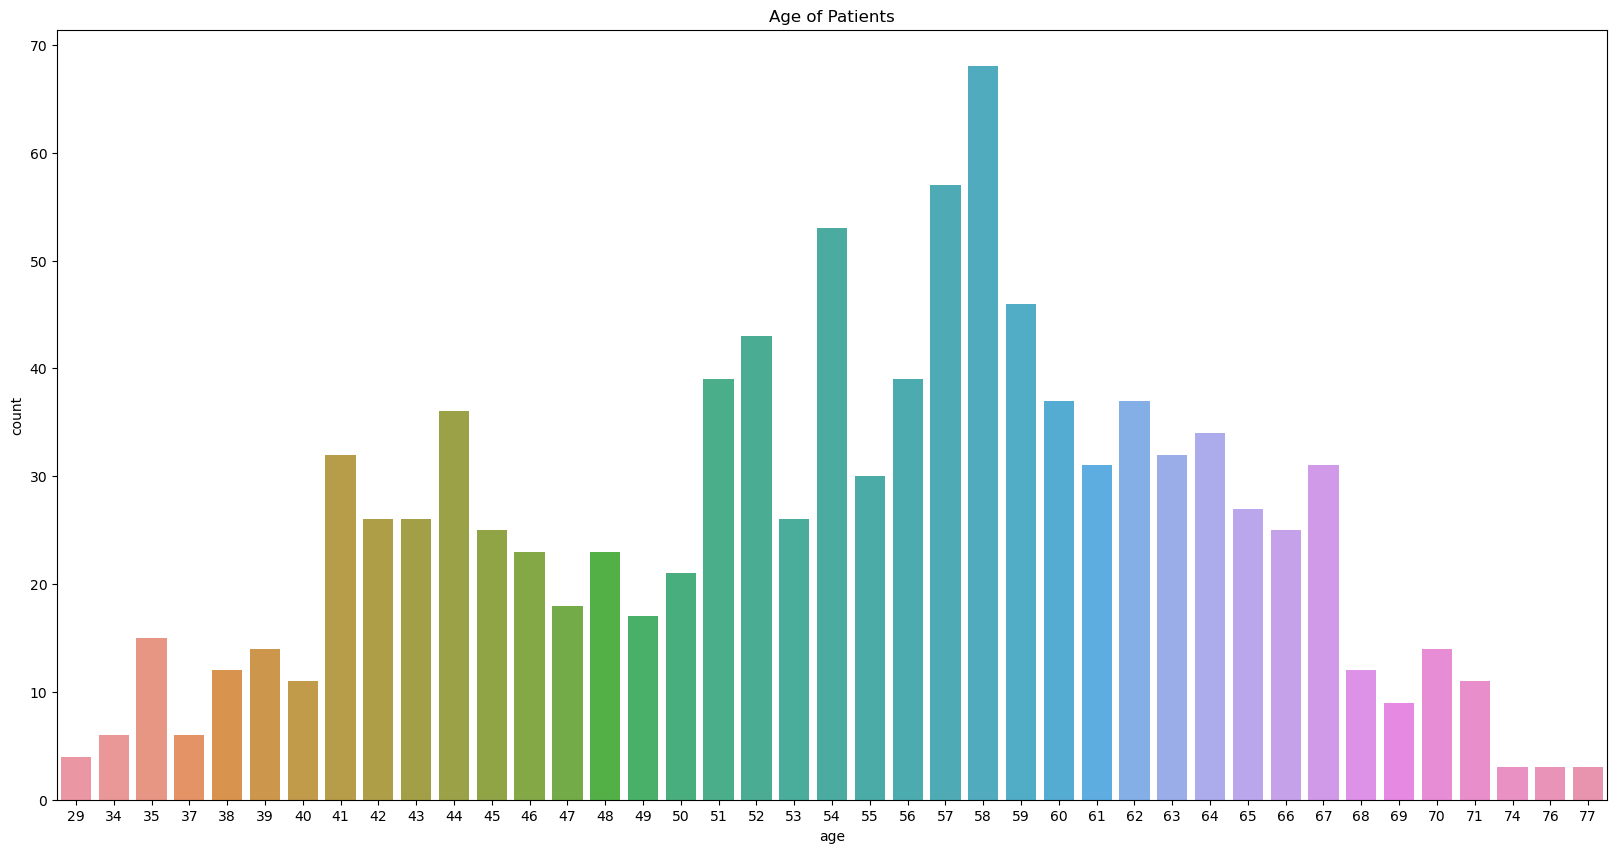

In [10]:
plt.figure(figsize=(20, 10))
plt.title("Age of Patients")
plt.xlabel("Age")
sns.countplot(x='age',data=data);

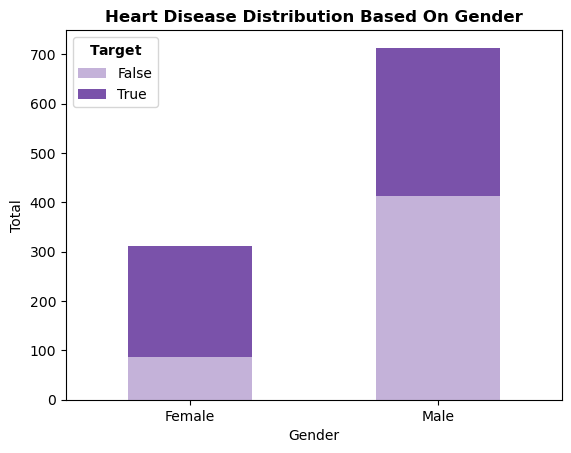

In [11]:
crosstb = pd.crosstab(data.sex, data.target)
pl = crosstb.plot(kind = 'bar', stacked=True, rot = 0, color = ['#c4b2d9','#7a52aa'])
plt.title('Heart Disease Distribution Based On Gender', fontweight='heavy')
plt.xticks([0, 1], ['Female','Male'])
plt.xlabel('Gender')
plt.ylabel('Total')
plt.legend(labels = ['False','True'], title='$\\bf{Target}$')
plt.show()


## <div style="font-family: Trebuchet MS; background-color: #A5D7F5; color: #253DA1; padding: 12px; font-size: 25px; line-height: 1.5;">Data Preprocessing</div>

In [12]:
# Instead of using random_state, we can do cross validation (K folds validation) 
# We use random state in machine learning model to control any such randomness involved 
# in machine learning models to get consistent results and improve model performances.

# Splitting the samples
X = data.drop('target',axis=1)
y = data['target'].values
y = y / np.max(y)

X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size = 0.2,
                                                 random_state = 0)

# Checking if the samples are splitted
print(X.shape)
print(X_train.shape)
print(X_test.shape)

# Normalizing the features
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

(1025, 13)
(820, 13)
(205, 13)


## <div style="font-family: Trebuchet MS; background-color: #A5D7F5; color: #253DA1; padding: 12px; font-size: 25px; line-height: 1.5;">Machine Learning Models</div>

#### <div style="font-family: Trebuchet MS; background-color: #F4D6D6; color: #DDDDD; padding: 12px; font-size: 18px; line-height: 0.5;">Logistic Regression</div>

In [13]:
# Train the logistic regression model and select the best hyperparameter with cross-validation

from random import shuffle
import random
random.seed(123)

# here we use 10-fold cross-validation
folds = 10

# get the number of samples in the training and validation set
num_train_val = X_train.shape[0]

# shuffle the index of samples in the train_val set
index_of_samples = np.arange(num_train_val) 
shuffle(index_of_samples)

# split the index of the train_valid set into 10 folds
index_of_folds = index_of_samples.reshape(folds, -1)
print(index_of_folds)
print("\n")

# potential hyperparameters. 
#These hyperparameters are just used for illustration. 
#You should try more hyperparameters to get a good model.
#The hyperparameters must be nonnegative!
regularization_coefficient = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 50, 100]

best_acc = 0.0
best_reg = 0.0

for reg in regularization_coefficient:
    
    sum_acc = 0.0
    for fold in range(folds):
        
        index_of_folds_temp = index_of_folds.copy()
        
        #get the index of the validation set
        valid_index = index_of_folds_temp[fold,:].reshape(-1)
        #get the index of the training set
        train_index = np.delete(index_of_folds_temp, fold, 0).reshape(-1)
        
        # training set
        X_train_val = X_train[train_index]
        y_train_val = y_train[train_index]
        
        # validation set
        X_valid_val = X_train[valid_index]
        y_valid_val = y_train[valid_index]
        
        # build the model with different hyperparameters
        lr = LogisticRegression(max_iter=10000, penalty='l2', C=reg, solver='lbfgs')
        
        #train the model with the training set
        lr.fit(X_train_val, y_train_val)
        
        y_valid_pred = lr.predict(X_valid_val)
        acc = accuracy_score(y_valid_val, y_valid_pred)
        
        sum_acc += acc
    
    cur_acc = sum_acc / folds
    
    print("reg_coeff: {}, acc: {:.3f}".format(1.0/reg, cur_acc))
    
    # store the best hyperparameter
    if cur_acc > best_acc:
        best_acc = cur_acc
        best_reg = reg

print("\n\033[31;1;48;5;226mThe hightest accuracy was " + str(best_acc))
print('The lambda (parameter) with the highest accuracy was ' + str(best_reg))

[[ 35  81 599 535 516 799 130 300 124 151 390 523 801 402 336 277 794 131
  275 191 253 499  41 422 288 153 537 696 128 142 290 489 304 678 451 447
  231 584 520 608 555 194 295 786 173 704 638 450 589 485 365 519 224 399
  772 714 216  88 401 502 350  26 530  97 565 247 686 657 118 316 355 707
  671 755 740  59 219 453   3 358 403 656]
 [695 326 233 121 658  76 242 245 103 327 292 232 119 585 412  67 426 524
  452 486 210 536 177 241 626  38 594 432 750 267 287 628 629 318 734  27
  171 161 362 592 420 562 165 320 503 553 590 257 299 582 156 414 811   9
  393 492 315 376 757 209 477  55 421  93 595 689 708 331 308 382 510 159
  302 178 762 190 379 256 741  11 301 666]
 [359  51  72 434 418 719 543 338 620 152 175  79 354 635 815 614 679 184
  192 100 463 751 475 337 685 203 515 617 563 469 706 763 406 726 293 716
  273 419 296 778 457 591 172  91 554 478 347 250 588 328 571 411  60 431
  622 168 195 805 309 464 366 699 437 730 640 647 433 141 202 132 289 158
  470 468 648 353 244 745 

In [14]:
# retrain the model
lr = LogisticRegression(penalty='l2', C=best_reg, solver='lbfgs')
lr.fit(X_train, y_train)

# evaluate the model on the testing set
lr_predict = lr.predict(X_test)

print(classification_report(y_test,lr_predict))

lr_acc = accuracy_score(lr_predict, y_test)
print("\n\033[31;1;48;5;226mLogistic Regression Accuracy: \033[1m {:.2f}%".format(lr_acc*100))

              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85        98
         1.0       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205


Logistic Regression Accuracy:  86.34%


#### <div style="font-family: Trebuchet MS; background-color: #F4D6D6; color: #DDDDD; padding: 12px; font-size: 18px; line-height: 0.5;">K-Nearest Neighbour (KNN)</div>

In [29]:
k_range = range(1,10)
param_grid = dict(n_neighbors = k_range)

knn = KNeighborsClassifier(n_neighbors = 1)

grid = GridSearchCV(knn, param_grid, cv = 5, scoring = 'accuracy')
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)

0.9865853658536585
{'n_neighbors': 1}


In [27]:
knn =  KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
knn.fit(X_train, y_train)

# evaluate the model on the testing set
knn_predict = knn.predict(X_test)

print(classification_report(y_test,knn_predict))

knn_acc = accuracy_score(knn_predict, y_test)
print("\n\033[31;1;48;5;226mK-Nearest Neighbour Accuracy: \033[1m {:.2f}%".format(knn_acc*100))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        98
         1.0       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205


K-Nearest Neighbour Accuracy:  100.00%


#### <div style="font-family: Trebuchet MS; background-color: #F4D6D6; color: #DDDDD; padding: 12px; font-size: 18px; line-height: 0.5;">Random Forest Classfier</div>

In [17]:
rf = RandomForestClassifier(n_estimators=100, random_state=2, max_leaf_nodes=20, min_samples_split=15)
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)

print(classification_report(y_test,rf_predict))

rf_acc = accuracy_score(rf_predict, y_test)
print("\n\033[31;1;48;5;226mRandom Forest Accuracy: \033[1m {:.2f}%".format(rf_acc*100))

              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95        98
         1.0       0.93      0.98      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205


Random Forest Accuracy:  95.12%
